**Part I : Segmentation**

**I. Bring the dataset titled water_rides.csv into your local environment in Jupyter
Notebook. This dataset contains information about 146 different water rides that
Lobster Land might add before the start of the 2022 season.**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

Saving water_rides.csv to water_rides.csv


In [4]:
water_rides = pd.read_csv('water_rides.csv')
print(water_rides)

     rideID  rider_group  max_speed  total_height  soak_level  \
0         1            4      27.47         59.64         4.0   
1         2            4      25.02        106.54         6.0   
2         3            5      30.82         61.17         6.0   
3         4            1      34.10         97.18         6.0   
4         5            3      30.38         89.46         5.0   
..      ...          ...        ...           ...         ...   
141     142            5      22.55         52.44         7.0   
142     143            4      19.16         93.50         6.0   
143     144            1      29.71         62.16         3.0   
144     145            2      38.49         80.91         2.0   
145     146            3      27.19        109.58         7.0   

     max_hourly_throughput  avg_duration  square_feet  installation_cost  \
0                   658.35         66.77      7389.98           46702.30   
1                   455.65         48.15     11757.48           545

**A. Drop the rideID variable.
a. Why will rideID not be relevant in a clustering model? In your answer,
do not just write “it will confuse the model.” Instead, take the time to
explain this with a sentence or two, using a bit of math and your
understanding of Euclidean distance.**

In [5]:
water_rides1=water_rides.drop(['rideID'],axis=1)

In [6]:
water_rides1

rider_group  max_speed  total_height  soak_level  max_hourly_throughput  \
0              4      27.47         59.64         4.0                 658.35   
1              4      25.02        106.54         6.0                 455.65   
2              5      30.82         61.17         6.0                 536.13   
3              1      34.10         97.18         6.0                 673.44   
4              3      30.38         89.46         5.0                 518.29   
..           ...        ...           ...         ...                    ...   
141            5      22.55         52.44         7.0                 884.15   
142            4      19.16         93.50         6.0                1011.72   
143            1      29.71         62.16         3.0                 438.22   
144            2      38.49         80.91         2.0                 492.08   
145            3      27.19        109.58         7.0                 622.10   

     avg_duration  square_feet  installation_cost  maintenance_cost  
0           66.77      7389.98           46702.30           4980.30  
1           48.15     11757.48           54579.92           5313.93  
2           65.02      9403.26           51244.81           5510.27  
3           62.18      6191.53           50332.71           5039.14  
4           75.54      9632.71           50069.21           6169.58  
..            ...          ...                ...               ...  
141         73.93      4776.29           37412.64           5725.10  
142         81.60      7552.68           51310.62           4732.18  
143         61.71      8899.01           42104.62           6361.64  
144         63.67     10298.33           48164.58           5005.91  
145         76.24      6452.24           50971.88           5421.32  

[146 rows x 9 columns]

*Since RideID is a unique identifier and does not give any additional value and these are numeric values or arbitrary values and it does not truly represent any numeric quantities hence variable needs to be dropped. Euclidean distance is used to calculate the distance between the data points in a cluster. On considering a scenario, where the RideID is included in clustering model. It leads to incorrect cluster nodes because the distance calculated for the RideID does not refer to any specific feature thereby reducing the efficiency of the model. For example if the Euclidean distance for a actual feature such as avg_duration is 5. At the same time if the distance for RideID is 5.It will lead to grouping of these nodes to same cluster group. Whereas, RideID does not significantly indicate any features but still belong to a cluster group which reduces the coherence of the clustering model.*

**B. Call the describe() function on your dataset.
a. How does this function help you to gain an overall sense of the columns
and values in this (or any other) dataset? Why is this valuable for any
analyst who will use a dataset to build a model?**

In [7]:
water_rides1.describe()

rider_group   max_speed  total_height  soak_level  \
count   146.000000  146.000000    146.000000  146.000000   
mean      3.034247   27.977055     84.398904    4.130137   
std       1.492114    5.444213     25.553449    2.407642   
min       1.000000   11.870000     15.130000    0.000000   
25%       2.000000   24.720000     66.617500    2.000000   
50%       3.000000   28.110000     85.465000    4.000000   
75%       4.000000   32.315000    101.997500    6.000000   
max       8.000000   38.870000    144.010000    8.000000   

       max_hourly_throughput  avg_duration   square_feet  installation_cost  \
count             146.000000    146.000000    146.000000         146.000000   
mean              656.367671     70.963288   8365.876096       48274.652192   
std               267.974494      8.010506   1536.103405        3898.341493   
min                 1.350000     48.150000   4246.200000       37412.640000   
25%               506.185000     65.632500   7249.445000       45799.077500   
50%               645.805000     70.770000   8347.685000       48463.020000   
75%               865.947500     76.192500   9424.557500       51056.420000   
max              1259.730000     94.840000  12044.960000       56666.250000   

       maintenance_cost  
count        146.000000  
mean        5294.443082  
std          750.138648  
min         2870.020000  
25%         4837.440000  
50%         5334.280000  
75%         5825.502500  
max         7204.960000

*Describe function helps in gaining a statistical insight of the dataset. It returns percentile, mean, std, IQR of a data frame or a series of numeric values. On using the describe function in water_rides data set, it helps in understanding of minimum and maximum values of several features of the dataset such as total_height, soak_level, max_speed which are significant for analysis. It also helps in determing the mean and standard deviation of dataset for further research. Data Analysts use statistics to gather, review, analyse, and draw conclusions from data, as well as apply quantified mathematical models to appropriate variables. Statistical measure plays an important role to maximize their performance, interpret data, recommend innovative solutions, and create a mechanism to achieve improvements.*

**C. Missing values.
a. Does this dataset contain any missing values? If so, how many? Which
columns have missing values?**

In [9]:
print(water_rides1.isna().sum().sum())

0


*There are no missing values in the dataset.*

**D. Data scaling.
a. Do your variables need to be standardized? Why or why not?**

*Yes, the variables needs to be standardised for building a clustering model. There are variables with different scales and units which are totally unique. Standardization helps in preventing large scales variables to dominate the definition of the clusters. It also helps in eliminating the redundant data in order to ensure high quality clusters for designing of efficient clustering algorithms.*


**b. If your data requires standardization, use Python to convert your values
into z-scores, and store the normalized data in a new dataframe. If not,
proceed to the next step without changing the variables.**

In [50]:
water_ridesN= water_rides[["max_speed","total_height","max_hourly_throughput","avg_duration","square_feet","installation_cost","maintenance_cost"]]

In [51]:
water_ridesN.head()

max_speed  total_height  max_hourly_throughput  avg_duration  square_feet  \
0      27.47         59.64                 658.35         66.77      7389.98   
1      25.02        106.54                 455.65         48.15     11757.48   
2      30.82         61.17                 536.13         65.02      9403.26   
3      34.10         97.18                 673.44         62.18      6191.53   
4      30.38         89.46                 518.29         75.54      9632.71   

   installation_cost  maintenance_cost  
0           46702.30           4980.30  
1           54579.92           5313.93  
2           51244.81           5510.27  
3           50332.71           5039.14  
4           50069.21           6169.58

In [52]:
from sklearn import preprocessing

In [53]:
S_scaler=preprocessing.StandardScaler()

In [54]:
water_rides2= S_scaler.fit_transform(water_ridesN)

In [55]:
water_rides2=pd.DataFrame(water_rides2)

In [56]:
water_rides2.columns=water_ridesN.columns

In [57]:
water_rides2.head()

max_speed  total_height  max_hourly_throughput  avg_duration  square_feet  \
0  -0.093457     -0.972242               0.007423     -0.525275    -0.637493   
1  -0.545025      0.869445              -0.751596     -2.857724     2.215527   
2   0.523993     -0.912161              -0.450235     -0.744491     0.677659   
3   1.128542      0.501893               0.063928     -1.100245    -1.420367   
4   0.442895      0.198741              -0.517038      0.573305     0.827545   

   installation_cost  maintenance_cost  
0          -0.404727         -0.420222  
1           1.622991          0.026067  
2           0.764526          0.288706  
3           0.529749         -0.341513  
4           0.461923          1.170650

In [58]:
print(water_rides2.describe().round(2))

       max_speed  total_height  max_hourly_throughput  avg_duration  \
count     146.00        146.00                 146.00        146.00   
mean        0.00          0.00                  -0.00         -0.00   
std         1.00          1.00                   1.00          1.00   
min        -2.97         -2.72                  -2.45         -2.86   
25%        -0.60         -0.70                  -0.56         -0.67   
50%         0.02          0.04                  -0.04         -0.02   
75%         0.80          0.69                   0.78          0.66   
max         2.01          2.34                   2.26          2.99   

       square_feet  installation_cost  maintenance_cost  
count       146.00             146.00            146.00  
mean          0.00               0.00              0.00  
std           1.00               1.00              1.00  
min          -2.69              -2.80             -3.24  
25%          -0.73              -0.64             -0.61  
50%         

In [59]:
water_rides2

max_speed  total_height  max_hourly_throughput  avg_duration  \
0    -0.093457     -0.972242               0.007423     -0.525275   
1    -0.545025      0.869445              -0.751596     -2.857724   
2     0.523993     -0.912161              -0.450235     -0.744491   
3     1.128542      0.501893               0.063928     -1.100245   
4     0.442895      0.198741              -0.517038      0.573305   
..         ...           ...                    ...           ...   
141  -1.000280     -1.254974               0.852941      0.371628   
142  -1.625103      0.357385               1.330633      1.332416   
143   0.319405     -0.873286              -0.816864     -1.159120   
144   1.937679     -0.137004              -0.615182     -0.913599   
145  -0.145065      0.988821              -0.128317      0.660992   

     square_feet  installation_cost  maintenance_cost  
0      -0.637493          -0.404727         -0.420222  
1       2.215527           1.622991          0.026067  
2       0.677659           0.764526          0.288706  
3      -1.420367           0.529749         -0.341513  
4       0.827545           0.461923          1.170650  
..           ...                ...               ...  
141    -2.344857          -2.795908          0.576079  
142    -0.531211           0.781465         -0.752126  
143     0.348264          -1.588181          1.427564  
144     1.262354          -0.028333         -0.385964  
145    -1.250061           0.694273          0.169720  

[146 rows x 7 columns]

**E. Elbow chart.
a. Build an elbow chart to help give you a sense of how you might build
your model.**

In [60]:
from sklearn.cluster import KMeans

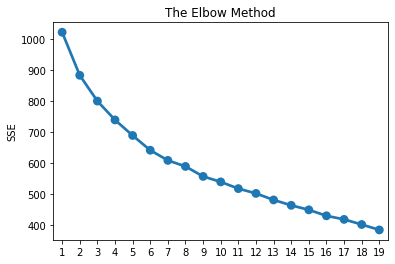

In [61]:
sse={}
for k in range (1, 20):
  kmeans = KMeans(n_clusters=k,random_state=1)
  kmeans.fit(water_rides2)
  sse[k]=kmeans.inertia_
plt.title('The Elbow Method')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()),y=list(sse.values()));

**F. How many clusters will you use for your k-means model? (Remember, as noted
in several places throughout the course material, there is no “right” answer to
this question. You may wish to answer this immediately after seeing your elbow
plot, or after doing some more experimentation).**

*On performing the analysis by varying the values for K. The number of clusters for the k-means model is 7 as shown below.*

**G. Build a k-means model with your desired number of clusters.**

In [62]:
model2 = KMeans(n_clusters=5,random_state=654)
model2.fit(water_rides2)
labels = model2.predict(water_rides2)

In [63]:
water_Rides1 = water_rides2.assign(Cluster=labels)
grouped = water_Rides1.groupby(['Cluster'])
grouped.agg({
  
    'max_speed' : 'mean',
    'total_height' : 'mean',
    'max_hourly_throughput' : 'mean',
    'avg_duration' : 'mean',
    'square_feet' : 'mean',
    'installation_cost' : 'mean',
    'maintenance_cost' : 'mean',
}).round(1)

max_speed  total_height  max_hourly_throughput  avg_duration  \
Cluster                                                                 
0              0.0          -1.2                    0.0           0.1   
1              0.1          -0.3                    0.2          -0.0   
2              0.1           0.3                   -0.8           0.4   
3              0.8           0.9                    0.3          -0.9   
4             -1.0           0.3                    0.2           0.5   

         square_feet  installation_cost  maintenance_cost  
Cluster                                                    
0                0.5               -0.5               0.6  
1               -0.9               -0.0              -1.0  
2                0.6                1.1               0.3  
3                0.5               -0.0              -0.1  
4               -0.5               -0.5               0.5

In [64]:
water_Rides1.head()

max_speed  total_height  max_hourly_throughput  avg_duration  square_feet  \
0  -0.093457     -0.972242               0.007423     -0.525275    -0.637493   
1  -0.545025      0.869445              -0.751596     -2.857724     2.215527   
2   0.523993     -0.912161              -0.450235     -0.744491     0.677659   
3   1.128542      0.501893               0.063928     -1.100245    -1.420367   
4   0.442895      0.198741              -0.517038      0.573305     0.827545   

   installation_cost  maintenance_cost  Cluster  
0          -0.404727         -0.420222        1  
1           1.622991          0.026067        3  
2           0.764526          0.288706        0  
3           0.529749         -0.341513        1  
4           0.461923          1.170650        2

In [65]:
model3 = KMeans(n_clusters=6,random_state=654)
model3.fit(water_rides2)
labels = model3.predict(water_rides2)

In [66]:
water_Rides2 = water_rides2.assign(Cluster=labels)
grouped = water_Rides2.groupby(['Cluster'])
grouped.agg({
    
    'max_speed' : 'mean',
    'total_height' : 'mean',
    'max_hourly_throughput' : 'mean',
    'avg_duration' : 'mean',
    'square_feet' : 'mean',
    'installation_cost' : 'mean',
    'maintenance_cost' : 'mean',
}).round(1)

max_speed  total_height  max_hourly_throughput  avg_duration  \
Cluster                                                                 
0             -0.4          -0.4                   -0.0          -0.2   
1              0.1           0.5                    0.8           0.8   
2             -1.4           0.1                   -0.3           0.7   
3             -0.0          -1.1                    0.0          -0.2   
4              1.0           0.8                    0.1          -0.7   
5             -0.0          -0.1                   -0.3           0.1   

         square_feet  installation_cost  maintenance_cost  
Cluster                                                    
0               -0.8                0.1              -1.6  
1               -0.9                0.5               0.2  
2               -0.1               -0.5               0.3  
3               -0.3               -1.1               0.4  
4                0.1               -0.2              -0.0  
5                1.0                0.9               0.3

In [67]:
water_Rides2.head()

max_speed  total_height  max_hourly_throughput  avg_duration  square_feet  \
0  -0.093457     -0.972242               0.007423     -0.525275    -0.637493   
1  -0.545025      0.869445              -0.751596     -2.857724     2.215527   
2   0.523993     -0.912161              -0.450235     -0.744491     0.677659   
3   1.128542      0.501893               0.063928     -1.100245    -1.420367   
4   0.442895      0.198741              -0.517038      0.573305     0.827545   

   installation_cost  maintenance_cost  Cluster  
0          -0.404727         -0.420222        3  
1           1.622991          0.026067        5  
2           0.764526          0.288706        5  
3           0.529749         -0.341513        4  
4           0.461923          1.170650        5

In [68]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=7,random_state=654)
model.fit(water_rides2)
labels = model.predict(water_rides2)

In [69]:
water_Rides = water_rides2.assign(Cluster=labels)
grouped = water_Rides.groupby(['Cluster'])
grouped.agg({
    
    'max_speed' : 'mean',
    'total_height' : 'mean',
    'max_hourly_throughput' : 'mean',
    'avg_duration' : 'mean',
    'square_feet' : 'mean',
    'installation_cost' : 'mean',
    'maintenance_cost' : 'mean',
}).round(1)

max_speed  total_height  max_hourly_throughput  avg_duration  \
Cluster                                                                 
0             -0.2           0.1                    0.7           0.6   
1              0.2           0.5                   -1.2          -0.1   
2              0.2          -1.3                    0.1          -0.3   
3             -1.1           0.2                    0.3           0.9   
4             -0.3          -0.4                    0.2          -0.4   
5              0.1           0.1                   -0.9           0.0   
6              1.2           0.9                    0.4          -0.9   

         square_feet  installation_cost  maintenance_cost  
Cluster                                                    
0               -1.0               -0.1               0.5  
1                0.6                0.8               0.5  
2                0.5               -0.0               0.6  
3                0.8                0.0              -0.1  
4               -0.6                0.4              -1.4  
5               -0.4               -1.2              -0.9  
6                0.0               -0.1               0.1

In [70]:
water_Rides.head()

max_speed  total_height  max_hourly_throughput  avg_duration  square_feet  \
0  -0.093457     -0.972242               0.007423     -0.525275    -0.637493   
1  -0.545025      0.869445              -0.751596     -2.857724     2.215527   
2   0.523993     -0.912161              -0.450235     -0.744491     0.677659   
3   1.128542      0.501893               0.063928     -1.100245    -1.420367   
4   0.442895      0.198741              -0.517038      0.573305     0.827545   

   installation_cost  maintenance_cost  Cluster  
0          -0.404727         -0.420222        4  
1           1.622991          0.026067        1  
2           0.764526          0.288706        2  
3           0.529749         -0.341513        6  
4           0.461923          1.170650        1

**H. Generate and show summary statistics about each of your clusters.**

In [71]:
Cluster_0= water_Rides[water_Rides['Cluster']==0]
Cluster_1= water_Rides[water_Rides['Cluster']==1]
Cluster_2= water_Rides[water_Rides['Cluster']==2]
Cluster_3= water_Rides[water_Rides['Cluster']==3]
Cluster_4= water_Rides[water_Rides['Cluster']==4]
Cluster_5= water_Rides[water_Rides['Cluster']==5]
Cluster_6= water_Rides[water_Rides['Cluster']==6]

In [73]:
Cluster_0[["max_speed","total_height","max_hourly_throughput","avg_duration","square_feet","installation_cost","maintenance_cost"]].describe()

max_speed  total_height  max_hourly_throughput  avg_duration  \
count  26.000000     26.000000              26.000000     26.000000   
mean   -0.219003      0.112517               0.741928      0.555142   
std     0.987143      0.888251               0.691415      0.746549   
min    -2.968749     -2.003037              -0.383470     -0.882283   
25%    -0.651006     -0.353765               0.254890      0.107004   
50%    -0.192986      0.166541               0.821300      0.523825   
75%     0.411562      0.641786               1.029084      0.910897   
max     1.283365      2.122106               2.038651      1.991314   

       square_feet  installation_cost  maintenance_cost  
count    26.000000          26.000000         26.000000  
mean     -1.006615          -0.081205          0.546002  
std       0.605367           1.076645          0.910537  
min      -2.344857          -2.795908         -1.185559  
25%      -1.349063          -0.439274          0.005631  
50%      -1.075696           0.091514          0.441442  
75%      -0.686571           0.684004          0.971128  
max       0.092821           1.690348          2.555652

In [74]:
Cluster_1[["max_speed","total_height","max_hourly_throughput","avg_duration","square_feet","installation_cost","maintenance_cost"]].describe()

max_speed  total_height  max_hourly_throughput  avg_duration  \
count  21.000000     21.000000              21.000000     21.000000   
mean    0.216102      0.524725              -1.210923     -0.093466   
std     0.676470      0.562997               0.673021      1.035959   
min    -1.612201     -0.247348              -2.452743     -2.857724   
25%    -0.288829      0.095072              -1.531660     -0.550329   
50%     0.424464      0.443776              -1.289463     -0.182047   
75%     0.680660      0.869445              -0.727856      0.637191   
max     1.207797      1.679159               0.069957      1.468956   

       square_feet  installation_cost  maintenance_cost  
count    21.000000          21.000000         21.000000  
mean      0.623579           0.829566          0.531497  
std       0.899542           0.634741          0.732265  
min      -0.872235          -0.557529         -0.658261  
25%      -0.114634           0.461923         -0.099006  
50%       0.610304           0.763311          0.734915  
75%       1.154485           1.266242          1.122560  
max       2.300174           2.021620          1.698336

In [75]:
Cluster_2[["max_speed","total_height","max_hourly_throughput","avg_duration","square_feet","installation_cost","maintenance_cost"]].describe()

max_speed  total_height  max_hourly_throughput  avg_duration  \
count  23.000000     23.000000              23.000000     23.000000   
mean    0.158411     -1.335799               0.078354     -0.276378   
std     0.673119      0.599616               0.852735      0.865186   
min    -0.727496     -2.720077              -1.593295     -1.811755   
25%    -0.310026     -1.801394              -0.421758     -0.850340   
50%     0.046621     -1.379848              -0.268176     -0.304808   
75%     0.488052     -0.819292               0.816095      0.314005   
max     1.369993     -0.276014               1.909951      1.219677   

       square_feet  installation_cost  maintenance_cost  
count    23.000000          23.000000         23.000000  
mean      0.495718          -0.043932          0.564448  
std       0.732403           0.894899          0.677409  
min      -0.812326          -1.588181         -1.251895  
25%      -0.010662          -0.576636          0.192126  
50%       0.512952          -0.046459          0.514225  
75%       0.942476           0.667730          0.984679  
max       1.985711           2.130944          1.524291

In [76]:
Cluster_3[["max_speed","total_height","max_hourly_throughput","avg_duration","square_feet","installation_cost","maintenance_cost"]].describe()

max_speed  total_height  max_hourly_throughput  avg_duration  \
count  21.000000     21.000000              21.000000     21.000000   
mean   -1.103057      0.235186               0.309798      0.933534   
std     0.854080      0.789152               0.622433      1.023879   
min    -2.603808     -0.871715              -0.566354     -0.292281   
25%    -1.800201     -0.290543              -0.077054      0.126107   
50%    -0.806751     -0.024303               0.072728      0.627170   
75%    -0.362555      0.893791               0.569217      1.473966   
max     0.061366      1.899062               1.674194      2.990935   

       square_feet  installation_cost  maintenance_cost  
count    21.000000          21.000000         21.000000  
mean      0.827545           0.009659         -0.101183  
std       0.798729           1.044313          0.805737  
min      -0.531211          -1.392344         -1.592454  
25%       0.163260          -0.724475         -0.614840  
50%       0.748836          -0.052884         -0.233362  
75%       1.509944           0.760217          0.617547  
max       2.403320           2.160017          1.282452

In [77]:
Cluster_4[["max_speed","total_height","max_hourly_throughput","avg_duration","square_feet","installation_cost","maintenance_cost"]].describe()

max_speed  total_height  max_hourly_throughput  avg_duration  \
count  18.000000     18.000000              18.000000     18.000000   
mean   -0.339618     -0.436272               0.209069     -0.371129   
std     0.671094      0.747840               0.977180      0.678569   
min    -1.448162     -1.574619              -2.255480     -1.412157   
25%    -0.709525     -0.971555              -0.233052     -0.865998   
50%    -0.465771     -0.513784               0.104968     -0.468280   
75%     0.111131      0.163596               0.779567      0.010549   
max     0.970032      0.644044               1.702653      1.000462   

       square_feet  installation_cost  maintenance_cost  
count    18.000000          18.000000         18.000000  
mean     -0.573219           0.363461         -1.380429  
std       0.693176           0.735632          0.658843  
min      -2.042231          -0.776213         -2.282333  
25%      -0.902656          -0.301772         -1.886615  
50%      -0.695501           0.416470         -1.449102  
75%      -0.350223           0.911502         -0.791079  
max       0.751985           1.937349         -0.201070

In [78]:
Cluster_5[["max_speed","total_height","max_hourly_throughput","avg_duration","square_feet","installation_cost","maintenance_cost"]].describe()

max_speed  total_height  max_hourly_throughput  avg_duration  \
count  16.000000     16.000000              16.000000     16.000000   
mean    0.141888      0.052098              -0.860696      0.041944   
std     0.910932      0.888404               0.692637      0.768169   
min    -1.706201     -1.621741              -2.056682     -1.841819   
25%    -0.489270     -0.552856              -1.339742     -0.223698   
50%     0.235543      0.238598              -0.902352      0.205024   
75%     0.824425      0.588283              -0.263139      0.524139   
max     1.508228      1.606905               0.203525      0.926555   

       square_feet  installation_cost  maintenance_cost  
count    16.000000          16.000000         16.000000  
mean     -0.364577          -1.183262         -0.869886  
std       0.932625           0.659025          0.841578  
min      -2.691132          -2.400674         -3.243092  
25%      -0.719738          -1.756426         -1.160147  
50%      -0.281788          -1.007291         -0.825390  
75%       0.155847          -0.748508         -0.513407  
max       0.955671          -0.153317          0.392965

In [79]:
Cluster_6[["max_speed","total_height","max_hourly_throughput","avg_duration","square_feet","installation_cost","maintenance_cost"]].describe()

max_speed  total_height  max_hourly_throughput  avg_duration  \
count  21.000000     21.000000              21.000000     21.000000   
mean    1.167599      0.898055               0.373297     -0.938533   
std     0.649717      0.689400               0.865647      0.601223   
min    -0.604006     -0.250882              -1.169001     -1.988380   
25%     0.879719      0.436707              -0.331608     -1.333240   
50%     1.165405      0.981752               0.278266     -0.913599   
75%     1.692541      1.369724               0.884283     -0.526528   
max     2.007718      2.340831               2.259317      0.325279   

       square_feet  installation_cost  maintenance_cost  
count    21.000000          21.000000         21.000000  
mean      0.021335          -0.100575          0.121473  
std       0.783711           0.841329          0.525466  
min      -1.422157          -2.159568         -0.840386  
25%      -0.335220          -0.814813         -0.317140  
50%       0.176939          -0.015980          0.002283  
75%       0.484680           0.529749          0.619219  
max       1.262354           1.527206          1.090135

**I. Build any four simple visualizations to help management better understand your
clusters (a simple visualization could be a histogram, a barplot, a scatterplot, etc.)
You may wish to facet your visualizations by cluster.
For each one of your visualizations, include 2-3 sentences of description/
explanation. What does it show about your model?**

In [80]:
water_Rides['Cluster']= water_Rides['Cluster'].astype('category')

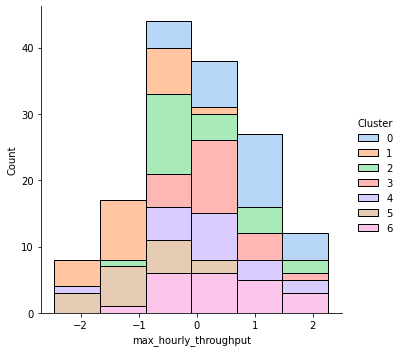

In [81]:
sns.displot(x='max_hourly_throughput', hue="Cluster" ,bins=6,palette='pastel',multiple='stack',data=water_Rides)

*The above displot shows the maximum hourly throughput defined for each cluster. Cluster 0 contains maximum number of park visitors who can be on a ride within one hour. Followed by Cluster 3 and 6. Least number of vistors who can go on a ride within one hour of operation are accomodated in Cluster5.*



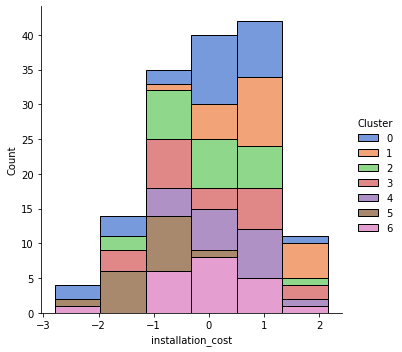

In [82]:
sns.displot(x='installation_cost', hue="Cluster" ,bins=6,palette='muted',multiple='stack',data=water_Rides)

*The above histplot shows installation costs of rides in USD with respect to the clusters. Cluster 1 has maximum installation costs for almost 30 rides in USD. Followed by Cluster 4 has second highest installation costs for its rides. Cluster 0 and Cluster 5 contains rides with low intsallation costs.*

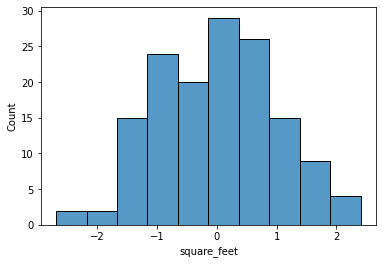

In [83]:
sns.histplot(x='square_feet', data=water_Rides);

*The above histplot depicts the square feet range of the rides within the park.There are around 5 rides which takes up maximum amount of space in the park.Rest of the rides occupy minimal space for their operation.*


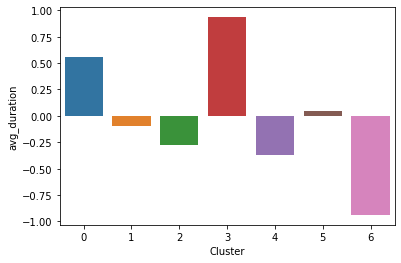

In [84]:
sns.barplot(x='Cluster',y='avg_duration',ci=None,data=water_Rides)

*The above bar plot indicates average duration of each ride installed in the park with respect to the clusters. Cluster 3 contains rides with maximum ride time. Followed by Cluster 0 and Cluster 5.*

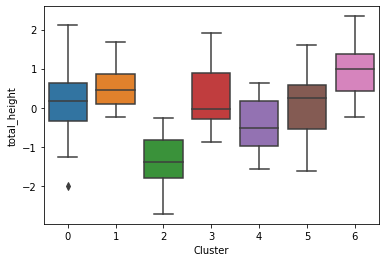

In [85]:
sns.boxplot(x='Cluster', y='total_height', data=water_Rides);

*The above box plot indicates the total_height of rides with respect to clusters. Cluster 6 and Cluster 1 contains variables with maximum height.  Basically,it indicates that these clusters contains rides with maximum height in feet.*

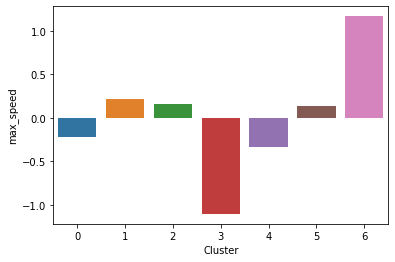

In [86]:
sns.barplot(x='Cluster',y='max_speed',ci=None,data=water_Rides)

*The above bar plot indicates the max_speed with respect to individual clusters. Cluster 6 contains data points with maximum speed followed by Cluster 2. Cluster 5 has a value closer to the mean. Cluster 6 contains the fastest speed reached during the duration of a ride.*

**J. Give a descriptive name to each one of your clusters, along with a few sentences
of explanation for the name that you chose. Keep in mind that the data itself is
describing rides (not visitors).
For each cluster, also include a couple sentences about targeting. What types of
visitors would be interested in these groups of rides, and how should Lobster
Land reach them? You can exercise some ‘creative freedom’ here with this
answer.**

*Cluster 0 :"LobsterLand Lovers" - This group mainly attracts people who likes to go on rides with maximum duration. It mainly indicates that indicates people who enjoys every ride of LobsterLand.*


*Cluster 1 :"Lazy dazy" - This group contains people who likes to be a part of rides with short duration of time and rides which occupies maximum space.
It mainly fcouses on people who have come here for relaxing purposes.*


*Cluster 2 : "Normal Visitors" - This group contains visitors who hates  rides which includes dangerous heights but like to take part in group rides for short duration of time. It mainly indicates a crowd with family and kids.*

*Cluster 3 :"Scary Cats" - This group contains people who are scared of high speed rides and mainly focus on comfortable rides which occupies maximum space.This group focuses on kids and old people*

*Cluster 4 : "Choosy ones" - People of this group mainly likes to go on a ride for shorter duration and less number of people. They seem to be very particular in the rides they choose.This often leads to high maintainence costs.*

*Cluster 5 : "LobsterLand Regulars" - This group mainly attracts people who likes to go on normal short duration rides and they like to try the rides which has less crods.This group seem to visit Lobster Land often hence they know which rides to hop on to avoid the crowds.*

*Cluster 6 :"Adrenaline Junkies" - This group focuses on people that likes to attempt fast speed rides with maximum height. They mainly contain people who are interested to try daangerous rides.This cluster mainly highlights youth and teenagers to be part of it.*


**K. How can Lobster Land use this model? This is the most open-ended question on
the assignment, so stop and take a moment with it – it’s not a “throwaway
question.” Write 2-3 paragraphs here to assess the way that Lobster Land might
be able to use these results. You might want to think about some ‘what if’
scenarios, and some ways in which Lobster Land’s priorities could impact their
decision regarding the way to use the model.**

*A Successful Theme Park definitely houses memorable attractions and rides that makes the visitors to come over and over again. Clustering Model developed for Lobster Land definitely helps in operating more productively as they source inputs via surveys through the visitors this provides easy access to information which helps in better coordinating leading to motivating improvement. On using this cluster models it helps the management of Lobster Land to focus on the key areas leading to development and maximising the performance of the park. Clustering model clearly provides the insight on individual groups of people to be focused on during specific parts of the day and seasons of the year. It clearly shows the cluster of people who enjoy the long duration rides and who like Adrenaline lovers. This provides a better understanding of visitor's interest which in turn helps the management of the park to work and focus on in order to increase the revenue.*

*On identifying certain days and groups of people it helps to cut down on maintainence and operational costs. If the visitors are mainly interested in rides for longer duration, the company can save up time and resources by planning accordingly to avoid the maintenance costs of water games for that particular day. There are several set of visitors who likes to take part in short duration rides this helps in reducing the maximum throughput and the operational costs for the ride. Hence, Clustering plays a major role in smart planning of operation of the Lobster Land park.It also helps in addressing a specific consumer segment through several marketing strategies like providing discounts, coupons, reminder emails of upcoming events thereby increasing the foot fall and maximise the profits.*

**Part II: Conjoint Analysis with a Linear Model**

**A. Read the dataset entertainment.csv into your local environment in Jupyter
Notebook.**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving entertainment.csv to entertainment.csv


In [ ]:
entertainment = pd.read_csv('entertainment.csv')
print(entertainment)

      bundleID     live_science                 live_nature   live_magic  \
0            1  Liquid Air Show       All About Crustaceans  Card Tricks   
1            2  Liquid Air Show       All About Crustaceans  Card Tricks   
2            3  Liquid Air Show       All About Crustaceans  Card Tricks   
3            4  Liquid Air Show       All About Crustaceans  Card Tricks   
4            5  Liquid Air Show       All About Crustaceans  Card Tricks   
...        ...              ...                         ...          ...   
2587      2588    Chemistry Fun  Fun With Vipers and Cobras  Mind Reader   
2588      2589    Chemistry Fun  Fun With Vipers and Cobras  Mind Reader   
2589      2590    Chemistry Fun  Fun With Vipers and Cobras  Mind Reader   
2590      2591    Chemistry Fun  Fun With Vipers and Cobras  Mind Reader   
2591      2592    Chemistry Fun  Fun With Vipers and Cobras  Mind Reader   

          dance_troupes sing_styles comedy_styles  show_length  avg_rating  
0        A

In [ ]:
entertainment

bundleID     live_science                 live_nature   live_magic  \
0            1  Liquid Air Show       All About Crustaceans  Card Tricks   
1            2  Liquid Air Show       All About Crustaceans  Card Tricks   
2            3  Liquid Air Show       All About Crustaceans  Card Tricks   
3            4  Liquid Air Show       All About Crustaceans  Card Tricks   
4            5  Liquid Air Show       All About Crustaceans  Card Tricks   
...        ...              ...                         ...          ...   
2587      2588    Chemistry Fun  Fun With Vipers and Cobras  Mind Reader   
2588      2589    Chemistry Fun  Fun With Vipers and Cobras  Mind Reader   
2589      2590    Chemistry Fun  Fun With Vipers and Cobras  Mind Reader   
2590      2591    Chemistry Fun  Fun With Vipers and Cobras  Mind Reader   
2591      2592    Chemistry Fun  Fun With Vipers and Cobras  Mind Reader   

          dance_troupes sing_styles comedy_styles  show_length  avg_rating  
0        Atlanta Ballet     Beatles        Improv           10    7.516434  
1        Atlanta Ballet     Beatles        Improv           20    7.392987  
2        Atlanta Ballet     Beatles        Improv           30    8.921361  
3        Atlanta Ballet     Beatles     Slapstick           10    7.726377  
4        Atlanta Ballet     Beatles     Slapstick           20    9.659494  
...                 ...         ...           ...          ...         ...  
2587  Celtic Folk Dance    Open Mic     Slapstick           20    4.583213  
2588  Celtic Folk Dance    Open Mic     Slapstick           30    3.722079  
2589  Celtic Folk Dance    Open Mic      Open Mic           10    3.330641  
2590  Celtic Folk Dance    Open Mic      Open Mic           20    4.022420  
2591  Celtic Folk Dance    Open Mic      Open Mic           30    0.965666  

[2592 rows x 9 columns]

In [ ]:
entertainment1=entertainment.drop(['bundleID'],axis=1)

In [ ]:
entertainment1

live_science                 live_nature   live_magic  \
0     Liquid Air Show       All About Crustaceans  Card Tricks   
1     Liquid Air Show       All About Crustaceans  Card Tricks   
2     Liquid Air Show       All About Crustaceans  Card Tricks   
3     Liquid Air Show       All About Crustaceans  Card Tricks   
4     Liquid Air Show       All About Crustaceans  Card Tricks   
...               ...                         ...          ...   
2587    Chemistry Fun  Fun With Vipers and Cobras  Mind Reader   
2588    Chemistry Fun  Fun With Vipers and Cobras  Mind Reader   
2589    Chemistry Fun  Fun With Vipers and Cobras  Mind Reader   
2590    Chemistry Fun  Fun With Vipers and Cobras  Mind Reader   
2591    Chemistry Fun  Fun With Vipers and Cobras  Mind Reader   

          dance_troupes sing_styles comedy_styles  show_length  avg_rating  
0        Atlanta Ballet     Beatles        Improv           10    7.516434  
1        Atlanta Ballet     Beatles        Improv           20    7.392987  
2        Atlanta Ballet     Beatles        Improv           30    8.921361  
3        Atlanta Ballet     Beatles     Slapstick           10    7.726377  
4        Atlanta Ballet     Beatles     Slapstick           20    9.659494  
...                 ...         ...           ...          ...         ...  
2587  Celtic Folk Dance    Open Mic     Slapstick           20    4.583213  
2588  Celtic Folk Dance    Open Mic     Slapstick           30    3.722079  
2589  Celtic Folk Dance    Open Mic      Open Mic           10    3.330641  
2590  Celtic Folk Dance    Open Mic      Open Mic           20    4.022420  
2591  Celtic Folk Dance    Open Mic      Open Mic           30    0.965666  

[2592 rows x 8 columns]

**B. Based on the descriptions shown above, which of your variables are numeric,
and which are categorical? (The standard you should use when answering this is
that something that is both represented by a number, and for which that number
has valid mathematical meaning, is numeric).**

*Categorical - live_science, live_nature, live_magic, dance_troupes, sing_styles,	comedy_styles.*

*Numeric - show_length, avg_rating.*

**C. After first removing the bundleID variable, use the pandas get_dummies()
function in order to prepare the remaining variables for use in a linear model. Inside
this function, include this argument: drop_first = True. Doing this will save us from
the multicollinearity problem that would make our model unreliable. Be sure to
dummify ALL of your input variables, even the numeric ones.**

**a. Why should the numeric input variables based on this survey data be
dummified?**

In [ ]:
entertainment1.head()

live_science            live_nature   live_magic   dance_troupes  \
0  Liquid Air Show  All About Crustaceans  Card Tricks  Atlanta Ballet   
1  Liquid Air Show  All About Crustaceans  Card Tricks  Atlanta Ballet   
2  Liquid Air Show  All About Crustaceans  Card Tricks  Atlanta Ballet   
3  Liquid Air Show  All About Crustaceans  Card Tricks  Atlanta Ballet   
4  Liquid Air Show  All About Crustaceans  Card Tricks  Atlanta Ballet   

  sing_styles comedy_styles  show_length  avg_rating  
0     Beatles        Improv           10    7.516434  
1     Beatles        Improv           20    7.392987  
2     Beatles        Improv           30    8.921361  
3     Beatles     Slapstick           10    7.726377  
4     Beatles     Slapstick           20    9.659494

In [ ]:
entertainment1.isnull().values.any()

False

In [ ]:
entertainment1

live_science                 live_nature   live_magic  \
0     Liquid Air Show       All About Crustaceans  Card Tricks   
1     Liquid Air Show       All About Crustaceans  Card Tricks   
2     Liquid Air Show       All About Crustaceans  Card Tricks   
3     Liquid Air Show       All About Crustaceans  Card Tricks   
4     Liquid Air Show       All About Crustaceans  Card Tricks   
...               ...                         ...          ...   
2587    Chemistry Fun  Fun With Vipers and Cobras  Mind Reader   
2588    Chemistry Fun  Fun With Vipers and Cobras  Mind Reader   
2589    Chemistry Fun  Fun With Vipers and Cobras  Mind Reader   
2590    Chemistry Fun  Fun With Vipers and Cobras  Mind Reader   
2591    Chemistry Fun  Fun With Vipers and Cobras  Mind Reader   

          dance_troupes sing_styles comedy_styles  show_length  avg_rating  
0        Atlanta Ballet     Beatles        Improv           10    7.516434  
1        Atlanta Ballet     Beatles        Improv           20    7.392987  
2        Atlanta Ballet     Beatles        Improv           30    8.921361  
3        Atlanta Ballet     Beatles     Slapstick           10    7.726377  
4        Atlanta Ballet     Beatles     Slapstick           20    9.659494  
...                 ...         ...           ...          ...         ...  
2587  Celtic Folk Dance    Open Mic     Slapstick           20    4.583213  
2588  Celtic Folk Dance    Open Mic     Slapstick           30    3.722079  
2589  Celtic Folk Dance    Open Mic      Open Mic           10    3.330641  
2590  Celtic Folk Dance    Open Mic      Open Mic           20    4.022420  
2591  Celtic Folk Dance    Open Mic      Open Mic           30    0.965666  

[2592 rows x 8 columns]

In [ ]:
entertainment1.sort_values(by='avg_rating', ascending=False)

live_science                 live_nature   live_magic  \
79         Liquid Air Show       All About Crustaceans  Card Tricks   
95         Liquid Air Show       All About Crustaceans  Card Tricks   
124        Liquid Air Show       All About Crustaceans  Card Tricks   
1119  Science of Fireworks       All About Crustaceans  Mind Reader   
328        Liquid Air Show       Wide World of Canines  Card Tricks   
...                    ...                         ...          ...   
1109  Science of Fireworks       All About Crustaceans  Mind Reader   
681        Liquid Air Show  Fun With Vipers and Cobras  Card Tricks   
1439  Science of Fireworks       Wide World of Canines  Mind Reader   
1446  Science of Fireworks  Fun With Vipers and Cobras  Card Tricks   
1528  Science of Fireworks  Fun With Vipers and Cobras  Card Tricks   

          dance_troupes    sing_styles comedy_styles  show_length  avg_rating  
79           Salsa Vida        Beatles      Open Mic           20    9.986481  
95           Salsa Vida  Italian Opera     Slapstick           30    9.971483  
124   Celtic Folk Dance        Wiggles      Open Mic           20    9.961208  
1119  Celtic Folk Dance        Beatles     Slapstick           10    9.948701  
328      Hip-Hop Fusion        Beatles     Slapstick           20    9.940039  
...                 ...            ...           ...          ...         ...  
1109         Salsa Vida       Open Mic        Improv           30    0.144726  
681          Salsa Vida       Open Mic      Open Mic           10    0.121504  
1439  Celtic Folk Dance       Open Mic      Open Mic           30    0.109742  
1446     Atlanta Ballet        Beatles      Open Mic           10    0.086412  
1528         Salsa Vida        Wiggles      Open Mic           20    0.024006  

[2592 rows x 8 columns]

In [ ]:
entertainment2 = pd.get_dummies(entertainment1, drop_first=True, columns=['live_science', 'live_nature', 'live_magic','dance_troupes','sing_styles','comedy_styles','show_length'])

In [ ]:
entertainment2.head()

avg_rating  live_science_Liquid Air Show  \
0    7.516434                             1   
1    7.392987                             1   
2    8.921361                             1   
3    7.726377                             1   
4    9.659494                             1   

   live_science_Science of Fireworks  live_nature_Fun With Vipers and Cobras  \
0                                  0                                       0   
1                                  0                                       0   
2                                  0                                       0   
3                                  0                                       0   
4                                  0                                       0   

   live_nature_Wide World of Canines  live_magic_Mind Reader  \
0                                  0                       0   
1                                  0                       0   
2                                  0                       0   
3                                  0                       0   
4                                  0                       0   

   dance_troupes_Celtic Folk Dance  dance_troupes_Hip-Hop Fusion  \
0                                0                             0   
1                                0                             0   
2                                0                             0   
3                                0                             0   
4                                0                             0   

   dance_troupes_Salsa Vida  sing_styles_Italian Opera  sing_styles_Open Mic  \
0                         0                          0                     0   
1                         0                          0                     0   
2                         0                          0                     0   
3                         0                          0                     0   
4                         0                          0                     0   

   sing_styles_Wiggles  comedy_styles_Open Mic  comedy_styles_Slapstick  \
0                    0                       0                        0   
1                    0                       0                        0   
2                    0                       0                        0   
3                    0                       0                        1   
4                    0                       0                        1   

   show_length_20  show_length_30  
0               0               0  
1               1               0  
2               0               1  
3               0               0  
4               1               0

In [ ]:
entertainment2.columns

Index(['avg_rating', 'live_science_Liquid Air Show',
       'live_science_Science of Fireworks',
       'live_nature_Fun With Vipers and Cobras',
       'live_nature_Wide World of Canines', 'live_magic_Mind Reader',
       'dance_troupes_Celtic Folk Dance', 'dance_troupes_Hip-Hop Fusion',
       'dance_troupes_Salsa Vida', 'sing_styles_Italian Opera',
       'sing_styles_Open Mic', 'sing_styles_Wiggles', 'comedy_styles_Open Mic',
       'comedy_styles_Slapstick', 'show_length_20', 'show_length_30'],
      dtype='object')

**D. Build a linear model with your data, using the average rating as the outcome
variable, and with all of your other variables as inputs.**

In [ ]:
X = entertainment2[['live_science_Liquid Air Show',
       'live_science_Science of Fireworks',
       'live_nature_Fun With Vipers and Cobras',
       'live_nature_Wide World of Canines', 'live_magic_Mind Reader',
       'dance_troupes_Celtic Folk Dance', 'dance_troupes_Hip-Hop Fusion',
       'dance_troupes_Salsa Vida', 'sing_styles_Italian Opera',
       'sing_styles_Open Mic', 'sing_styles_Wiggles', 'comedy_styles_Open Mic',
       'comedy_styles_Slapstick', 'show_length_20', 'show_length_30']]
y = entertainment2['avg_rating']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [ ]:
regressor.intercept_

6.244344215804695

**E. Display the coefficient values of your model inputs.**

In [ ]:
coef_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coef_df

Coefficient
live_science_Liquid Air Show               0.119588
live_science_Science of Fireworks         -0.716544
live_nature_Fun With Vipers and Cobras    -2.308140
live_nature_Wide World of Canines         -0.909696
live_magic_Mind Reader                    -0.198544
dance_troupes_Celtic Folk Dance            0.262085
dance_troupes_Hip-Hop Fusion               0.700387
dance_troupes_Salsa Vida                   0.233955
sing_styles_Italian Opera                 -0.376198
sing_styles_Open Mic                      -1.240667
sing_styles_Wiggles                        0.397732
comedy_styles_Open Mic                    -0.316567
comedy_styles_Slapstick                    0.120984
show_length_20                             0.513810
show_length_30                            -0.081301

In [ ]:
regressor.coef_

array([ 0.11958766, -0.71654413, -2.30813966, -0.90969595, -0.19854373,
        0.26208465,  0.70038728,  0.23395451, -0.37619799, -1.24066742,
        0.39773183, -0.31656695,  0.12098437,  0.51380959, -0.08130061])

**F. Write a paragraph or two for Lobster Land management about what your model
is showing you.**

*On referring to the coefficients generated by regression model it provides understanding to the prefereneces of customers in LobsterLand. Here the coefficients indicate the strength of the opinions. The above coefficients are in reference to the entertainment dataset of LobsterLand. The highest magnitude of all is dance_troupes_Hip-Hop Fusion which indicates that visitors of lobster land enjoy dancing and love the hip-hop fusion dance show over other dancing styles. Liquid air show seems to fascinate the crowd more than the fireworks which can increase the pollutants in the air and can be avoided for safety purposes. The live nature shows mentioned above have negative values indicating that All About Crustaceans show seems to be preferred by visitors more when compared to the rest as Vipers and Cobras seems to be dangerous and not everybody prefers to be a part of it. Card tricks seems to be more popular in a magic show of LobsterLand as per the model's prediction. Mind reader seems to be fascinating but not everybody would love to try it so Card tricks takes a lead here.Wiggles sing style is preferred more by visitors of lobsterland which seems to be unrealistic as Beatles, open mic, Opera clearly attracts more crowd than Wiggles. Comedy Style slap sticks is preferred evidently as it indicates positive value. Visitors generally enjoy a show of 20 mins not too long for the visitors to get bored or short which is a convincing prediction. This model definitely provides a clear preference of enetertainment shows in LobsterLand but including wider range of options in the survey definitely helps in narrowing the best preference.*

**Part III: Wildcard: Marketing & Segments**

**A. Find ANY advertisement…ANYWHERE. As you walk around in your daily life, you
might look for an ad on the side of the T, on a bus stop, on a poster, etc. Alternatively,
you could use an advertisement that you encounter while browsing the web.**

*I came across this advertisement of "hotels.com" while using youtube.*

**a. Take a picture of the ad that you see (if it’s in the ‘real world’). Or, if the ad you
select is online, take a screenshot from your phone or your laptop to capture
this advertisement.**

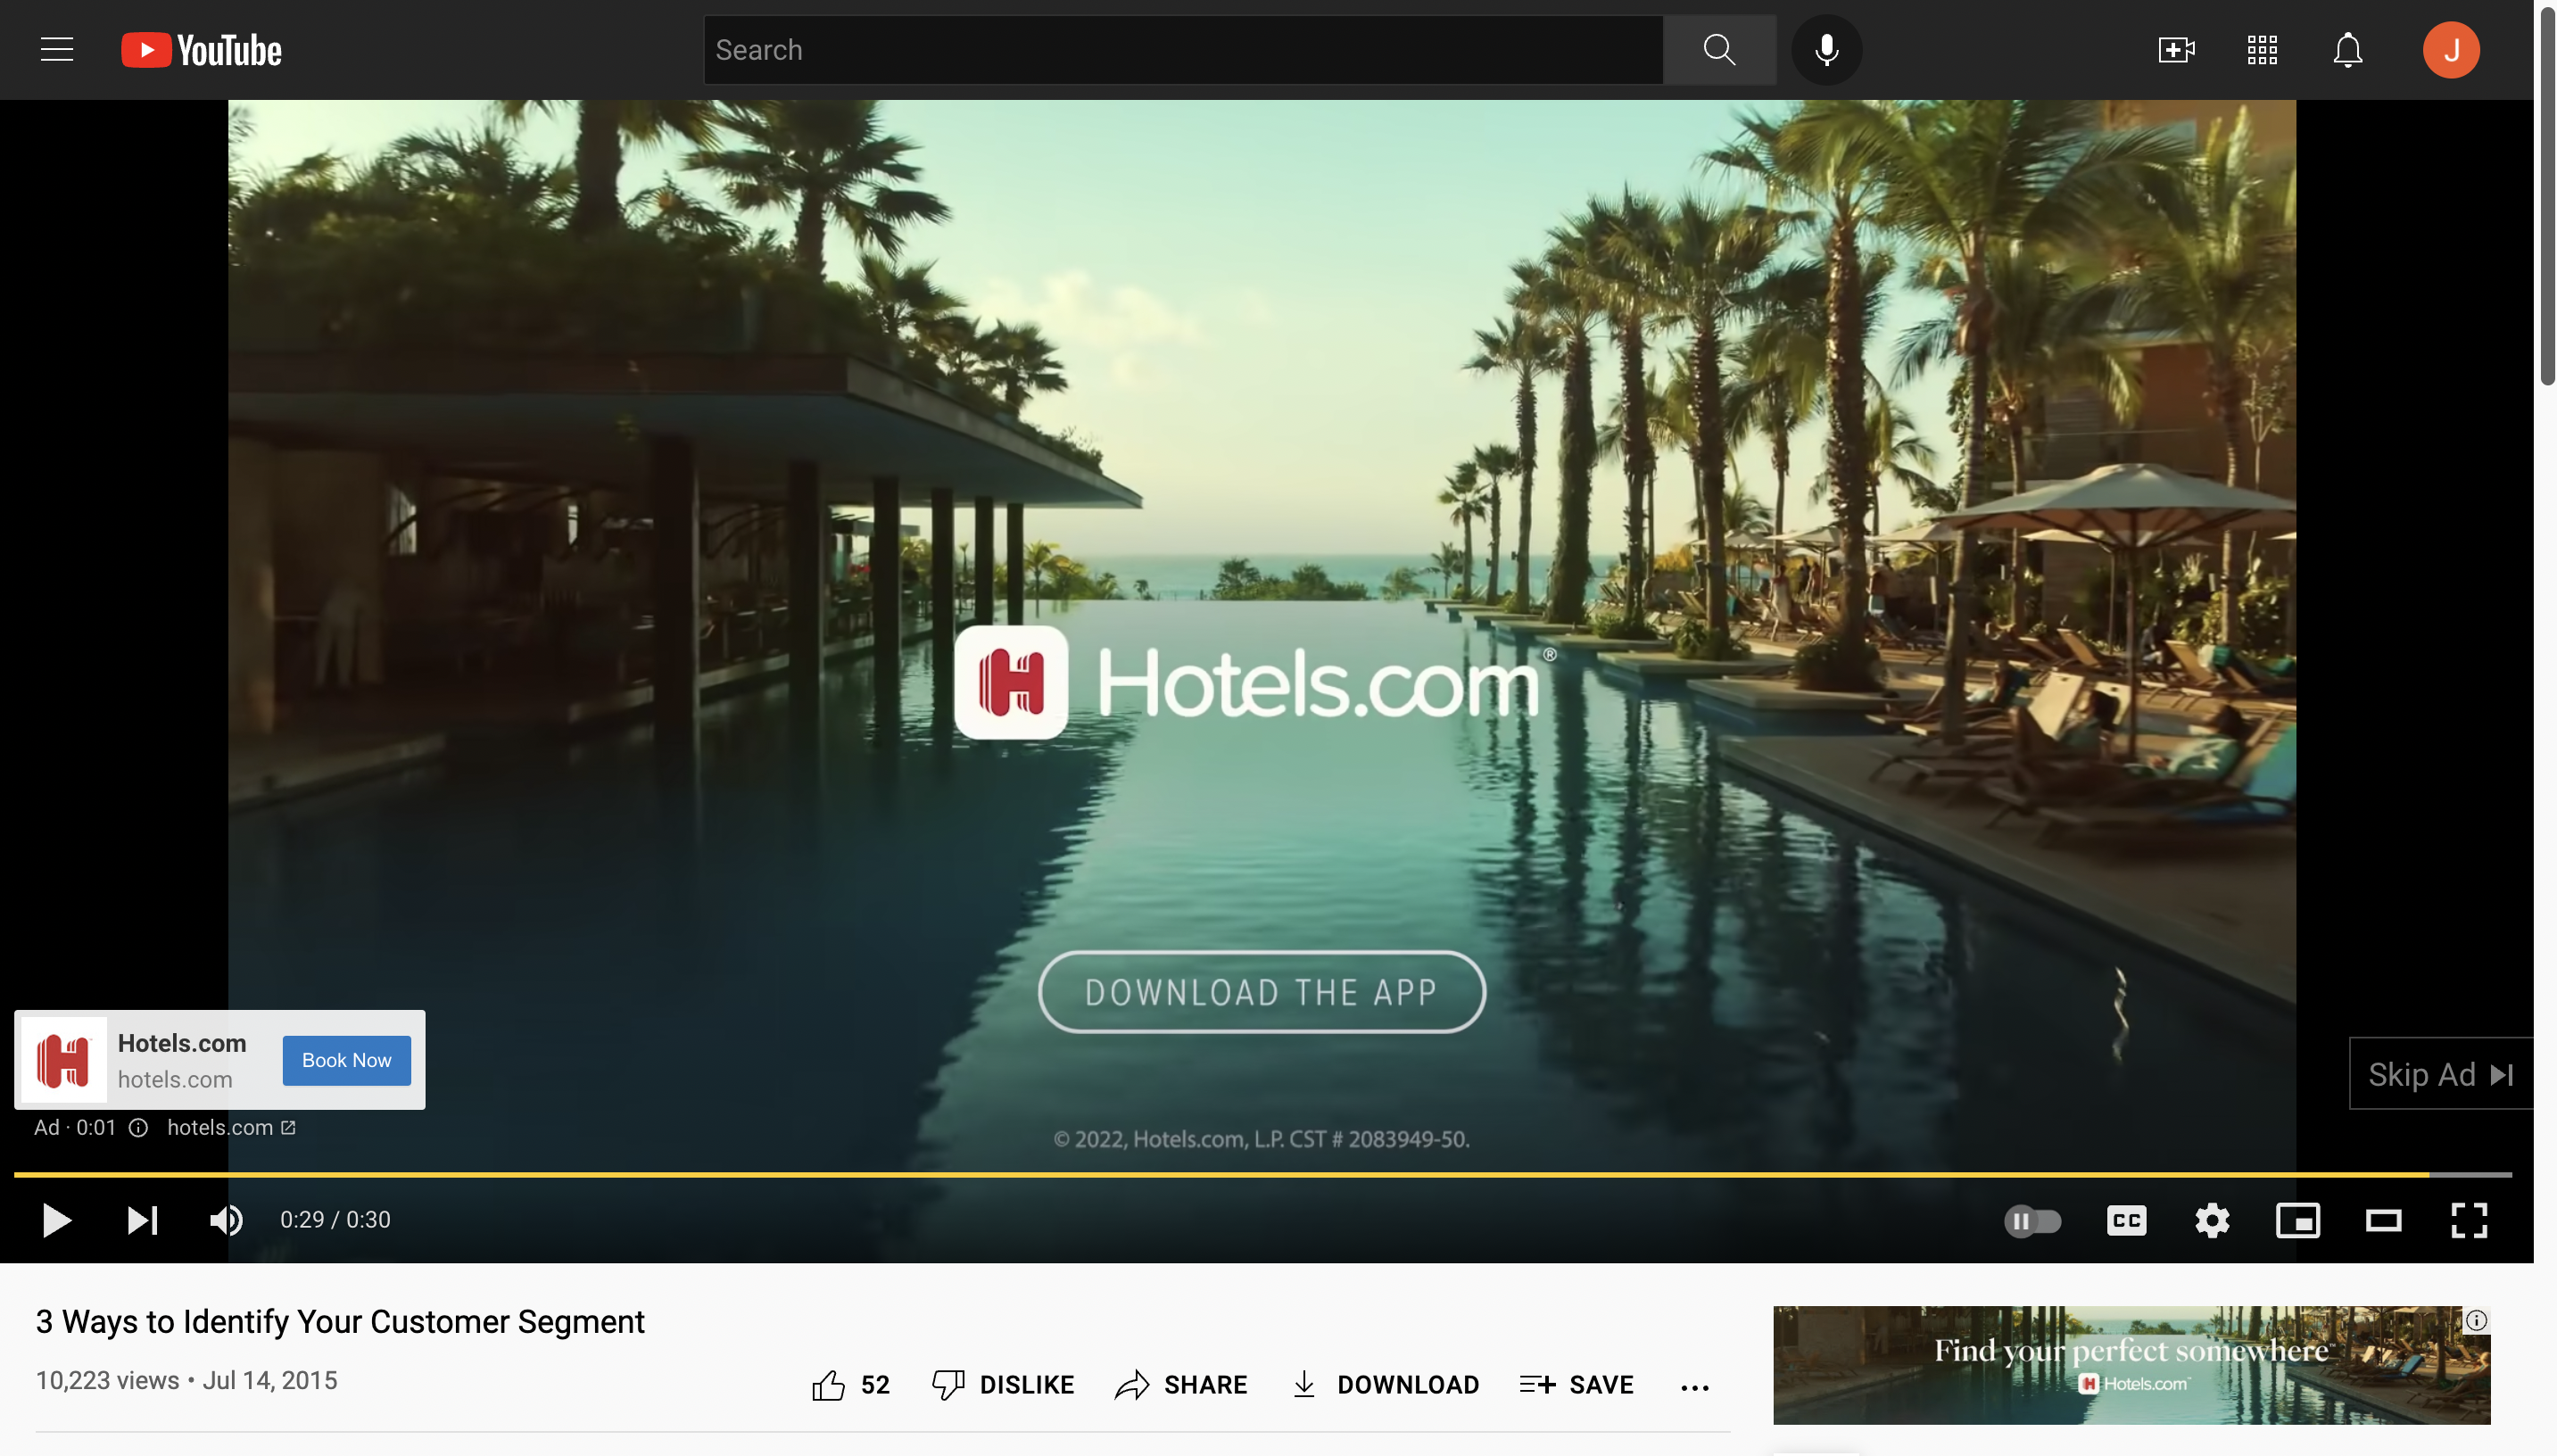

**b. Write ONE thoughtful paragraph that addresses the issue of segmentation.
What consumer segment is your ad targeting? What makes you think this?
What types of consumers are in the segment? Are you part of the segment? Or,
alternatively, is your ad an undifferentiated (mass market) ad? Finally, what is
your opinion of this ad – is it effective?**

*Hotels.com ad addresses demographic segmentation. It mainly targets the customers who are interested in Travel and Tourism, accomodation and hotels and air travel. The targeted customer segment is predicted to have following criteria:*

*Age - 18 to 60*

*Lifecycle stage - Bachelor Stage Newly Married Couples Full Nest I Full Nest II Empty Nest I*

*Occupation - Students, employees, professionals, senior manager, executives.*

*I definitely belong to this customer segment. I dont think the ad belongs to mass marketing as the relevant travel related searches has led to appropriate content. This was basically a video ad for 30 secs which was designed very well depicting fancy hotels and emitting a good holiday vibe. It definitely made an impact as I was going through it. I would definitely consider checking their website before I book for my next holiday as they have exquisitely depicted their offers and the benefits of booking a hotel through their website*